In [233]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [259]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS= 3
EPOCHS= 10

In [235]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset', shuffle = True, 
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [236]:
type(dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

In [237]:
classes_names = dataset.class_names
classes_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [238]:
len(dataset)

68

In [239]:
2152/32

67.25

In [240]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(label_batch.numpy())

[[[186. 180. 184.]
  [178. 172. 176.]
  [179. 173. 177.]
  ...
  [143. 137. 141.]
  [140. 134. 138.]
  [138. 132. 136.]]

 [[181. 175. 179.]
  [176. 170. 174.]
  [181. 175. 179.]
  ...
  [144. 138. 142.]
  [143. 137. 141.]
  [141. 135. 139.]]

 [[177. 171. 175.]
  [173. 167. 171.]
  [178. 172. 176.]
  ...
  [150. 144. 148.]
  [148. 142. 146.]
  [146. 140. 144.]]

 ...

 [[158. 149. 152.]
  [158. 149. 152.]
  [158. 149. 152.]
  ...
  [137. 127. 126.]
  [146. 136. 135.]
  [150. 140. 139.]]

 [[159. 150. 153.]
  [160. 151. 154.]
  [160. 151. 154.]
  ...
  [127. 117. 116.]
  [126. 116. 115.]
  [119. 109. 108.]]

 [[156. 147. 150.]
  [158. 149. 152.]
  [160. 151. 154.]
  ...
  [127. 117. 116.]
  [129. 119. 118.]
  [122. 112. 111.]]]
[0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0]


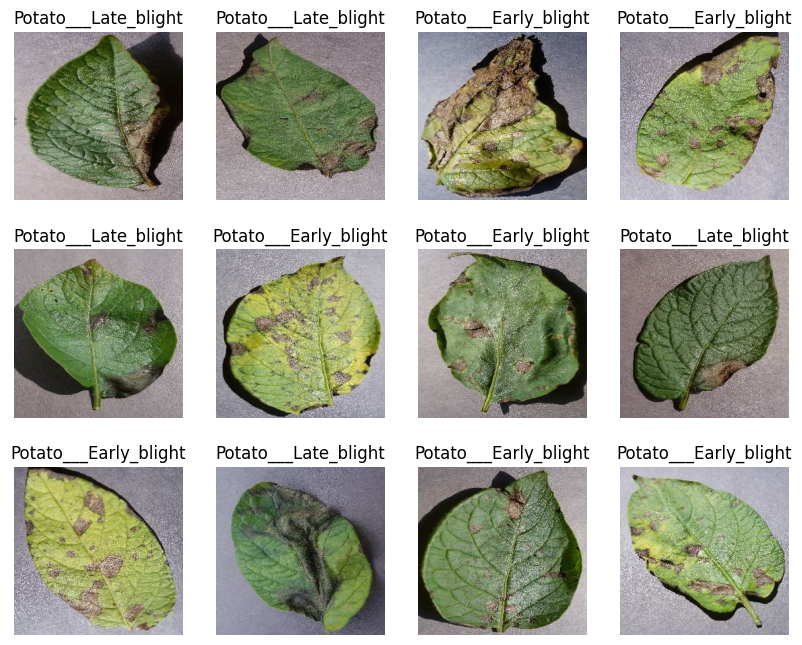

In [241]:
plt.figure(figsize =(10,8))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(classes_names[label_batch[i]])
        plt.axis('off')

In [242]:
80% ==> trainig
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (1374370855.py, line 1)

In [243]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [244]:
train_ds = dataset.take(54)
len(train_ds)

54

In [245]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [246]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [247]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [248]:
test_ds = test_ds.skip(6)
len(val_ds)

6

### Split tf Dataset

In [249]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size =10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 7)

    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    

    # taken 80% dataset
    train_ds = ds.take(train_size)    
    
    # taken 10% dataset for validation
    val_ds = ds.skip(train_size).take(val_size) 
    
    # taken 10% dataset for test
    test_ds = ds.skip(train_size).skip(val_size)    
    
    return train_ds, val_ds, test_ds

In [250]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [251]:
len(train_ds)

54

In [252]:
train_ds  = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds  = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [253]:
resize_rescale = keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [254]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

## Train Model

In [255]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = keras.Sequential([
    resize_rescale,
    data_augmentation,
    keras.layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(n_classes, activation = 'softmax')
])
model.build(input_shape = input_shape)

In [256]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [260]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = ['accuracy']
) 

In [261]:
history = model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=val_ds, verbose=1,)

Epoch 1/10
54/54 [==============================] - 94s 2s/step - loss: 0.4265 - accuracy: 0.8322 - val_loss: 0.4326 - val_accuracy: 0.8646
Epoch 2/10
54/54 [==============================] - 93s 2s/step - loss: 0.2821 - accuracy: 0.8938 - val_loss: 0.2532 - val_accuracy: 0.9062
Epoch 3/10
54/54 [==============================] - 98s 2s/step - loss: 0.2517 - accuracy: 0.8991 - val_loss: 0.1938 - val_accuracy: 0.9323
Epoch 4/10
54/54 [==============================] - 94s 2s/step - loss: 0.1753 - accuracy: 0.9343 - val_loss: 0.2326 - val_accuracy: 0.9115
Epoch 5/10
54/54 [==============================] - 92s 2s/step - loss: 0.1254 - accuracy: 0.9495 - val_loss: 0.2268 - val_accuracy: 0.8906
Epoch 6/10
54/54 [==============================] - 93s 2s/step - loss: 0.1235 - accuracy: 0.9536 - val_loss: 0.1371 - val_accuracy: 0.9271
Epoch 7/10
54/54 [==============================] - 94s 2s/step - loss: 0.0930 - accuracy: 0.9624 - val_loss: 0.1616 - val_accuracy: 0.9375
Epoch 8/10
54/54 [==

In [312]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 359ms/step - loss: 0.4275 - accuracy: 0.8398


In [313]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [314]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [315]:
acc =   history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =   history.history['loss']
val_loss = history.history['val_loss']

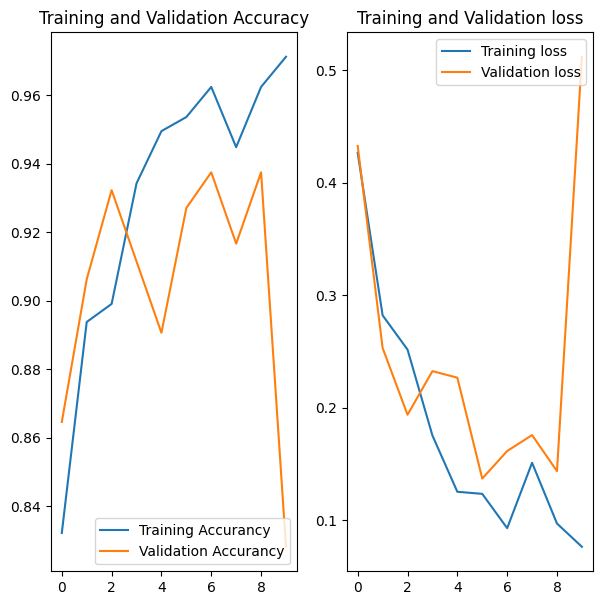

In [316]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accurancy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accurancy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

first image to predict
Actual label: Potato___Early_blight

1/1 [==============================] - 0s 355ms/step
Predicted label: Potato___Early_blight


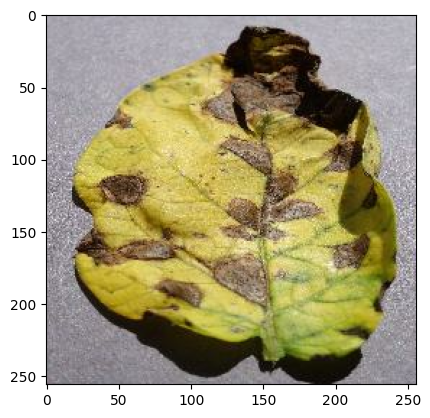

In [341]:
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    
    print('first image to predict')
    plt.imshow(first_image)
    print('Actual label:',classes_names[first_label])
    print()
    batch_prediction = model.predict(image_batch)
    print('Predicted label:',classes_names[np.argmax(batch_prediction[0])])

In [353]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = classes_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 85ms/step


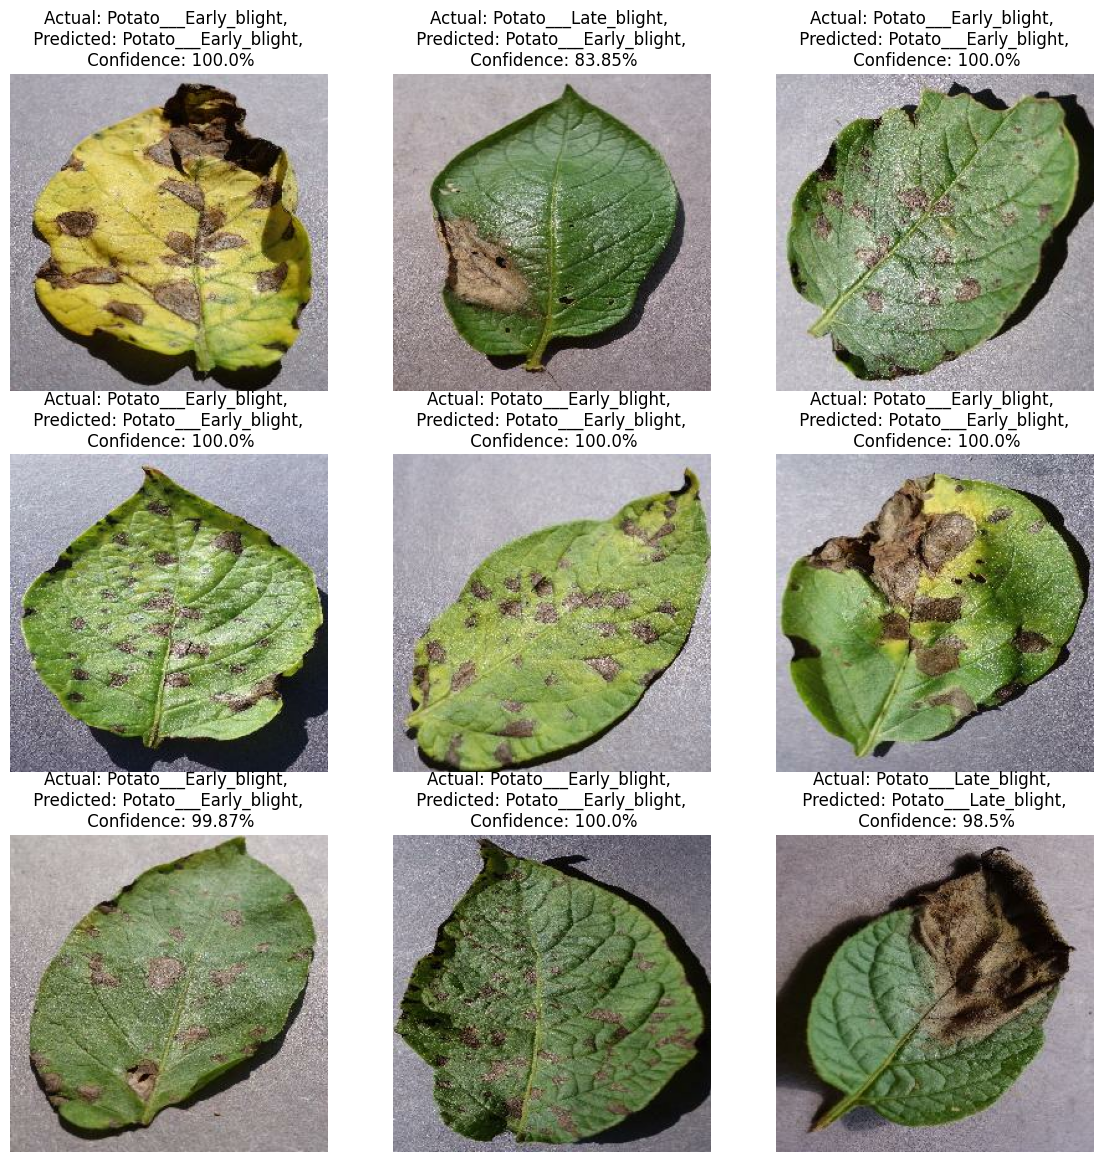

In [356]:
plt.figure(figsize = (14,14))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes_names[labels[i]]

        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%')
        plt.axis('off')

In [363]:
# model_version = 3
# model.save(f'./saved_models/{model_version}')